In [38]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras


In [ ]:
// This Function fetches the stock data for a given ticker symbol and would be used to display the data in the frontend
def fetch_stock_data(ticker_symbol, period="1y"):
    try:
        # Create ticker object
        ticker = yf.Ticker(ticker_symbol)
        
        # Get historical data
        hist = ticker.history(period=period)
        
        if hist.empty:
            return {
                "error": f"No data found for ticker {ticker_symbol}",
                "success": False
            }
        
        # Get current stock info
        info = ticker.info
        
        # Prepare the data
        stock_data = {
            "ticker": ticker_symbol,
            "current_price": hist['Close'].iloc[-1],
            "previous_close": hist['Close'].iloc[-2] if len(hist) > 1 else hist['Close'].iloc[-1],
            "change": hist['Close'].iloc[-1] - hist['Close'].iloc[-2] if len(hist) > 1 else 0,
            "change_percent": ((hist['Close'].iloc[-1] - hist['Close'].iloc[-2]) / hist['Close'].iloc[-2] * 100) if len(hist) > 1 else 0,
            "volume": hist['Volume'].iloc[-1],
            "high_52_week": hist['High'].max(),
            "low_52_week": hist['Low'].min(),
            "company_name": info.get('longName', ticker_symbol),
            "sector": info.get('sector', 'Unknown'),
            "industry": info.get('industry', 'Unknown'),
            "market_cap": info.get('marketCap', 0),
            "pe_ratio": info.get('trailingPE', 0),
            "dividend_yield": info.get('dividendYield', 0),
            "historical_data": {
                "dates": hist.index.strftime('%Y-%m-%d').tolist(),
                "prices": hist['Close'].tolist(),
                "volumes": hist['Volume'].tolist(),
                "highs": hist['High'].tolist(),
                "lows": hist['Low'].tolist(),
                "opens": hist['Open'].tolist()
            },
            "success": True
        }
        
        return stock_data
        
    except Exception as e:
        return {
            "error": f"Error fetching data for {ticker_symbol}: {str(e)}",
            "success": False
        }


In [60]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-17 00:00:00-04:00,189.997678,192.393701,189.908573,192.066971,50520200,0.0,0.0
2023-07-18 00:00:00-04:00,191.433317,192.403598,190.512528,191.809540,48353800,0.0,0.0
2023-07-19 00:00:00-04:00,191.185796,196.264932,190.740245,193.165970,80507300,0.0,0.0
2023-07-20 00:00:00-04:00,193.156046,194.522371,190.591725,191.215485,59581200,0.0,0.0
2023-07-21 00:00:00-04:00,192.175899,193.037270,189.334339,190.037308,71917800,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-10 00:00:00-04:00,210.509995,213.479996,210.029999,212.410004,44443600,0.0,0.0
2025-07-11 00:00:00-04:00,210.570007,212.130005,209.860001,211.160004,39765800,0.0,0.0
2025-07-14 00:00:00-04:00,209.929993,210.910004,207.539993,208.619995,38840100,0.0,0.0


In [ ]:
// This Function fetches the stock data for a given ticker symbol and would be used to create a dataframe to be used for the LSTM model
def make_df(ticker_symbol, period= "1y"):
    tick = yf.Ticker(ticker_symbol)
    hist = tick.history(period=period)
    df = pd.DataFrame(hist)
    return df


In [26]:
df =make_df("AAPL", "2y")

Exploratory Data Analysis

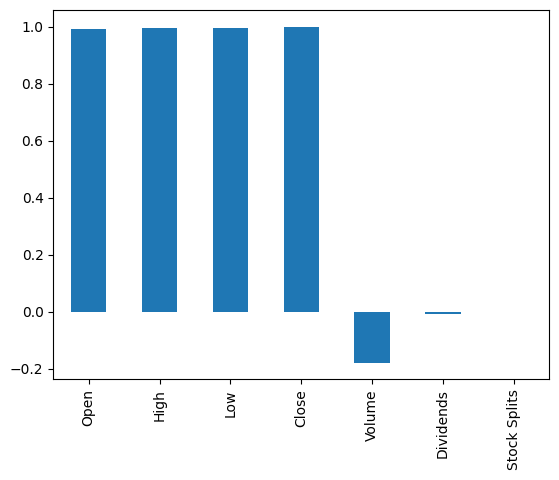

In [47]:
df.corr()['Close'].plot(kind='bar')
plt.show()



In [67]:
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
df.dropna(inplace=True)











KeyError: "['Dividends', 'Stock Splits'] not found in axis"

In [48]:
def predict_stock_price(ticker_symbol, days_ahead=30):
    # Fetch current data
    stock_data = fetch_stock_data(ticker_symbol)
    
    if not stock_data["success"]:
        return stock_data
    
    current_price = stock_data["current_price"]
    
    # Placeholder prediction (replace with your LSTM model)
    # This is just a simple example - you'll want to implement proper ML here
    import random
    prediction = current_price * (1 + random.uniform(-0.1, 0.1))  # ±10% random change
    
    return {
        "ticker": ticker_symbol,
        "current_price": current_price,
        "predicted_price": round(prediction, 2),
        "prediction_date": (datetime.now() + timedelta(days=days_ahead)).strftime('%Y-%m-%d'),
        "confidence": random.uniform(0.6, 0.9),  # Placeholder confidence
        "success": True
    }

def main():
    """
    Main function to handle command line arguments
    Usage: 
    - python lstm_stock_predictor.py <ticker_symbol> [days_ahead]  # For prediction
    - python lstm_stock_predictor.py <ticker_symbol> --data-only   # For data only
    """
    if len(sys.argv) < 2:
        print(json.dumps({
            "error": "Please provide a ticker symbol",
            "usage": "python lstm_stock_predictor.py <ticker_symbol> [days_ahead] or python lstm_stock_predictor.py <ticker_symbol> --data-only"
        }))
        return
    
    ticker_symbol = sys.argv[1].upper()
    
    # Check if we want data only
    if len(sys.argv) > 2 and sys.argv[2] == '--data-only':
        result = fetch_stock_data(ticker_symbol)
    else:
        days_ahead = int(sys.argv[2]) if len(sys.argv) > 2 else 30
        result = predict_stock_price(ticker_symbol, days_ahead)
    
    # Print result as JSON (for web app integration)
    print(json.dumps(result, indent=2))

if __name__ == "__main__":
    main() 

NameError: name 'sys' is not defined